Lambda School Data Science

*Unit 4, Sprint 1, Module 3*

---

# Document Classification (Assignment)

This notebook is for you to practice skills during lecture.

Today's guided module project and assignment will be different. You already know how to do classification. You ready know how to extract features from documents. So? That means you're ready to combine and practice those skills in a kaggle competition. We we will open with a five minute sprint explaining the competition, and then give you 25 minutes to work. After those twenty five minutes are up, I will give a 5-minute demo an NLP technique that will help you with document classification (*and **maybe** the competition*).

Today's all about having fun and practicing your skills.

## Sections
* <a href="#p1">Part 1</a>: Text Feature Extraction & Classification Pipelines
* <a href="#p2">Part 2</a>: Latent Semantic Indexing
* <a href="#p3">Part 3</a>: Word Embeddings with Spacy
* <a href="#p4">Part 4</a>: Post Lecture Assignment

# Text Feature Extraction & Classification Pipelines (Learn)
<a id="p1"></a>

## Follow Along 

What you should be doing now:
1. Join the Kaggle Competition
2. Download the data
3. Train a model (try using the pipe method I just demoed)

### Load Competition Data

In [1]:
import pandas as pd

# You may need to change the path
train = pd.read_csv('./data/train.csv')
test = pd.read_csv('./data/test.csv')

In [4]:
train.head()

,id,description,ratingCategory
0,1321,"\nSometimes, when whisky is batched, a few lef...",1
1,3861,\nAn uncommon exclusive bottling of a 6 year o...,0
2,655,\nThis release is a port version of Amrut’s In...,1
3,555,\nThis 41 year old single cask was aged in a s...,1
4,1965,"\nQuite herbal on the nose, with aromas of dri...",1


### Define Pipeline Components

In [2]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer


In [3]:
vect = TfidfVectorizer(stop_words='english', ngram_range=(1,2), min_df=5)
clf = RandomForestClassifier()

pipe = Pipeline([('vect', vect), ('clf', clf)])

### Define Your Search Space
You're looking for both the best hyperparameters of your vectorizer and your classification model. 

In [10]:

parameters = {
    'vect__max_df': (0.75, 1.0),
    'vect__min_df': (.02 , .05),
    'vect__max_features': (500,1000),
    'clf__n_estimators': (5,10),
    'clf__max_depth':(5,10,15,20)
}

grid_search = GridSearchCV(pipe,parameters, cv=5, n_jobs=4, verbose=1)
grid_search.fit(train.description, train.ratingCategory)

Fitting 5 folds for each of 64 candidates, totalling 320 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:   10.9s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:   44.2s
[Parallel(n_jobs=4)]: Done 320 out of 320 | elapsed:  1.2min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('vect',
                                        TfidfVectorizer(analyzer='word',
                                                        binary=False,
                                                        decode_error='strict',
                                                        dtype=<class 'numpy.float64'>,
                                                        encoding='utf-8',
                                                        input='content',
                                                        lowercase=True,
                                                        max_df=1.0,
                                                        max_features=None,
                                                        min_df=5,
                                                        ngram_range=(1, 2),
                                                        no

### Make a Submission File
*Note:* In a typical Kaggle competition, you are only allowed two submissions a day, so you only submit if you feel you cannot achieve higher test accuracy. For this competition the max daily submissions are capped at **20**. Submit for each demo and for your assignment. 

In [11]:
# Predictions on test sample
print(grid_search.best_score_)
pred = grid_search.predict(test['description'])

0.7154426265812368


In [12]:
submission = pd.DataFrame({'id': test['id'], 'ratingCategory':pred})
submission['ratingCategory'] = submission['ratingCategory'].astype('int64')

In [13]:
# Make Sure the Category is an Integer
submission.head()

,id,ratingCategory
0,3461,1
1,2604,1
2,3341,1
3,3764,1
4,2306,1


In [13]:
subNumber = 1

In [15]:
# Save your Submission File
# Best to Use an Integer or Timestamp for different versions of your model

submission.to_csv(f'./data/submission{subNumber}.csv', index=False)
subNumber += 1

## Challenge

You're trying to achieve a minimum of 70% Accuracy on your model.

## Latent Semantic Indexing (Learn)
<a id="p2"></a>

## Follow Along
1. Join the Kaggle Competition
2. Download the data
3. Train a model & try: 
    - Creating a Text Extraction & Classification Pipeline
    - Tune the pipeline with a `GridSearchCV` or `RandomizedSearchCV`
    - Add some Latent Semantic Indexing (lsi) into your pipeline. *Note:* You can grid search a nested pipeline, but you have to use double underscores ie `lsi__svd__n_components`
4. Make a submission to Kaggle 


### Define Pipeline Components

In [4]:
from sklearn.decomposition import TruncatedSVD

svd = TruncatedSVD(n_components=100, # Just here for demo. 
                   algorithm='randomized',
                   n_iter=100)
rfc = RandomForestClassifier(min_samples_split=5, class_weight='balanced',
                            min_samples_leaf= 3)

params = { 
    'lsi__svd__n_components': [10,100,250],
    'lsi__vect__max_df':[.9, .95, 1.0],
    'lsi__vect__ngram_range':[(1,3)],
    'clf__n_estimators':[90,100,110]
}

# LSI
lsi = Pipeline([('vect', vect), ('svd', svd)])


# Pipe
pipe = Pipeline([('lsi', lsi), ('clf', rfc)])
# Fit
grid_search = GridSearchCV(pipe,params, cv=5, n_jobs=-1, verbose=1)
grid_search.fit(data.data, data.target)


NameError: name 'data' is not defined

In [6]:
from sklearn.decomposition import TruncatedSVD

svd = TruncatedSVD(n_components=100, algorithm='randomized', n_iter=100)
lsi = Pipeline([('vect', vect), ('svd', svd)])
vect = TfidfVectorizer(stop_words='english', ngram_range=(1,2), min_df=5)
clf = RandomForestClassifier(min_samples_split=5, class_weight='balanced',
                            min_samples_leaf=3)

pipe = Pipeline([('lsi', lsi), ('clf', clf)])

### Define Your Search Space
You're looking for both the best hyperparameters of your vectorizer and your classification model. 

In [7]:
parameters = {
    'lsi__svd__n_components': [10,100,250],
    'lsi__vect__max_df':[.9, .95, 1.0],
    'clf__max_depth':(5,10,15,20)
}

grid_search = GridSearchCV(pipe,parameters, cv=5, n_jobs=-1, verbose=1)
grid_search.fit(train.description, train.ratingCategory)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:   35.9s
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:  7.5min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('lsi',
                                        Pipeline(memory=None,
                                                 steps=[('vect',
                                                         TfidfVectorizer(analyzer='word',
                                                                         binary=False,
                                                                         decode_error='strict',
                                                                         dtype=<class 'numpy.float64'>,
                                                                         encoding='utf-8',
                                                                         input='content',
                                                                         lowercase=True,
                                                                         max_df=1.0,
             

In [45]:
grid_search.best_params_

{'clf__max_depth': 15, 'lsi__svd__n_components': 100, 'lsi__vect__max_df': 1.0}

### Make a Submission File

In [8]:
# Predictions on test sample
pred = grid_search.predict(test['description'])

In [9]:
submission = pd.DataFrame({'id': test['id'], 'ratingCategory':pred})
submission['ratingCategory'] = submission['ratingCategory'].astype('int64')

In [10]:
# Make Sure the Category is an Integer
submission.head()

,id,ratingCategory
0,3461,1
1,2604,1
2,3341,1
3,3764,1
4,2306,1


In [14]:
# Save your Submission File
# Best to Use an Integer or Timestamp for different versions of your model

submission.to_csv(f'./data/submission{subNumber}.csv', index=False)
subNumber += 1

## Challenge

Continue to apply Latent Semantic Indexing (LSI) to various datasets. 

# Word Embeddings with Spacy (Learn)
<a id="p3"></a>

## Follow Along

In [20]:
# Apply to your Dataset

from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import GradientBoostingClassifier

from scipy.stats import randint
import spacy
nlp = spacy.load("en_core_web_lg")
param_dist = {
    
    'max_depth' : randint(3,10),
    'min_samples_leaf': randint(2,15)
}

In [16]:
t2 = train[train['ratingCategory'].isin([0,1])]

In [17]:
t2['ratingCategory'] = t2['ratingCategory'].map({0:1, 1:0})

<ipython-input-17-d6762b3b10b2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  t2['ratingCategory'] = t2['ratingCategory'].map({0:1, 1:0})


In [24]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(t2['description'], t2['ratingCategory'], test_size=.2)

In [23]:
from sklearn.linear_model import LogisticRegression

In [25]:
lr = LogisticRegression()
vec = TfidfVectorizer(stop_words='english', max_features=2000)
X_train = vec.fit_transform(X_train)
X_val = vec.transform(X_val)
lr.fit(X_train, y_train)
lr.score(X_val, y_val)

0.7515527950310559

In [28]:
y_val_pred = lr.predict_proba(X_val)[:,1]
y_val_pred.mean()

0.27278372502514503

Best Threshold: 0.27423
Performance with Adjustment
Recall: 0.70085
Accuracy: 0.69814


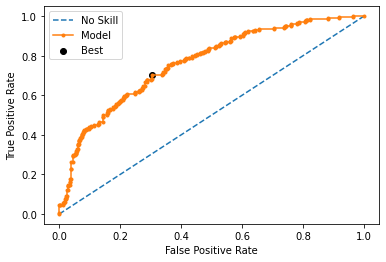

In [34]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import recall_score, accuracy_score
def roc_analysis(y_test, y_test_pred):
    fpr, tpr, thresholds = roc_curve(y_test, y_test_pred)
    # calculate the g-mean for each threshold
    gmeans = np.sqrt(tpr * (1-fpr))
    # locate the index of the largest g-mean
    ix = np.argmax(gmeans)
    print(f'Best Threshold: {thresholds[ix]:.5f}')
    print('==='*9)
    print('Performance with Adjustment')
    print('==='*9)
    y_pred_new = np.where(y_test_pred > thresholds[ix], 1, 0)
    r = recall_score(y_test, y_pred_new)
    a = accuracy_score(y_test, y_pred_new)
    print(f"Recall: {r:.5f}")
    print(f"Accuracy: {a:.5f}")
    plt.plot([0,1], [0,1], linestyle='--', label='No Skill')
    plt.plot(fpr, tpr, marker='.', label = 'Model')
    plt.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend();

roc_analysis(y_val, y_val_pred)
    

In [36]:
doc = nlp("Two bananas in pyjamas")
bananas_vector = doc.vector
def get_word_vectors(docs):
    return [nlp(doc).vector for doc in docs]
X = get_word_vectors(train['description'])

len(X) == len(train.description)
X_test = get_word_vectors(test['description'])
rfc.fit(X, train['ratingCategory'])
rfc.score(X, train['ratingCategory'])
rfc.predict(X_test)
test['ratingCategory'] = rfc.predict(X_test)


In [37]:
rfc.score(X, train['ratingCategory'])

0.9992659652556888

In [38]:
rfc.predict(X_test)

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

### Make a Submission File

In [41]:
# Predictions on test sample
pred = rfc.predict(X_test)

In [42]:
submission = pd.DataFrame({'id': test['id'], 'ratingCategory':pred})
submission['ratingCategory'] = submission['ratingCategory'].astype('int64')

In [43]:
# Make Sure the Category is an Integer
submission.head()

,id,ratingCategory
0,3461,1
1,2604,1
2,3341,1
3,3764,1
4,2306,1


In [44]:
# Save your Submission File
# Best to Use an Integer or Timestamp for different versions of your model

submission.to_csv(f'./data/submission{subNumber}.csv', index=False)
subNumber += 1

## Challenge

What you should be doing now:
1. Join the Kaggle Competition
2. Download the data
3. Train a model & try: 
    - Creating a Text Extraction & Classification Pipeline
    - Tune the pipeline with a `GridSearchCV` or `RandomizedSearchCV`
    - Add some Latent Semantic Indexing (lsi) into your pipeline. *Note:* You can grid search a nested pipeline, but you have to use double underscores ie `lsi__svd__n_components`
    - Try to extract word embeddings with Spacy and use those embeddings as your features for a classification model.
4. Make a submission to Kaggle 

# Post Lecture Assignment
<a id="p4"></a>

Your primary assignment this afternoon is to achieve a minimum of 70% accuracy on the Kaggle competition. Once you have achieved 70% accuracy, please work on the following: 

1. Research "Sentiment Analysis". Provide answers in markdown to the following questions: 
    - What is "Sentiment Analysis"? 
    - Is Document Classification different than "Sentiment Analysis"? Provide evidence for your response
    - How do create labeled sentiment data? Are those labels really sentiment?
    - What are common applications of sentiment analysis?
2. Research our why word embeddings worked better for the lecture notebook than on the whiskey competition.
    - This [text classification documentation](https://developers.google.com/machine-learning/guides/text-classification/step-2-5) from Google might be of interest
    - Neural Networks are becoming more popular for document classification. Why is that the case?

What is Sentiment Analysis- Essentially this is a technique that is used in NLP to determine if the text it looks over is positive or negative. Bag of words or embedding seems the way to go here.
Is document classification different from sentiment analysis- Yes, though I feel that sentiment analysis is a type of document classification. They're related, but sentiment is more focused (good/bad) where document is more broad (a/not-a)
How do you create labeled sentiment data- So this can be done with algorithms or manually. It's not really a sentiment, so much as a label that states it tends towards one or the other.
Common applications of sentiment analysis is to comb through reviews, search engines, or ads that pop up on you.

Word embedding worked better on our lecture than for whiskey because it was comparing two different (but similar) things. Neural networks are more popular for document classification because you can train these models and easily distribute them, while training them takes a great deal of compuational power, utilizing a trained model does not and it has the benefit of many repetitions.
